Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


In [30]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Imported required libraries

In [31]:
mushroom = pd.read_csv('D:\DataTrained Projects\Project1\mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Loaded mushrooms dataset and observed that class is target variable

In [32]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Found that all variables are of object datatype, so we need to perform label encoding to change the datatype

In [33]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


We couldn't get much info as most of the data is object type 

In [34]:
print(mushroom.isnull().values.any())
mushroom.isnull().sum()

False


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in mushroom.columns:
    mushroom[col]=le.fit_transform(mushroom[col])
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [36]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

Datatype is changed to int

In [37]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


We could see that there are no null values, but there might be some outliers as there is some difference between mean and 50% quartile in some variables, so we will perform scaling operation

In [38]:
corr_mat=mushroom.corr()
corr_mat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [41]:
mushroom.drop(['veil-type'],axis=1,inplace=True)

KeyError: "['veil-type'] not found in axis"

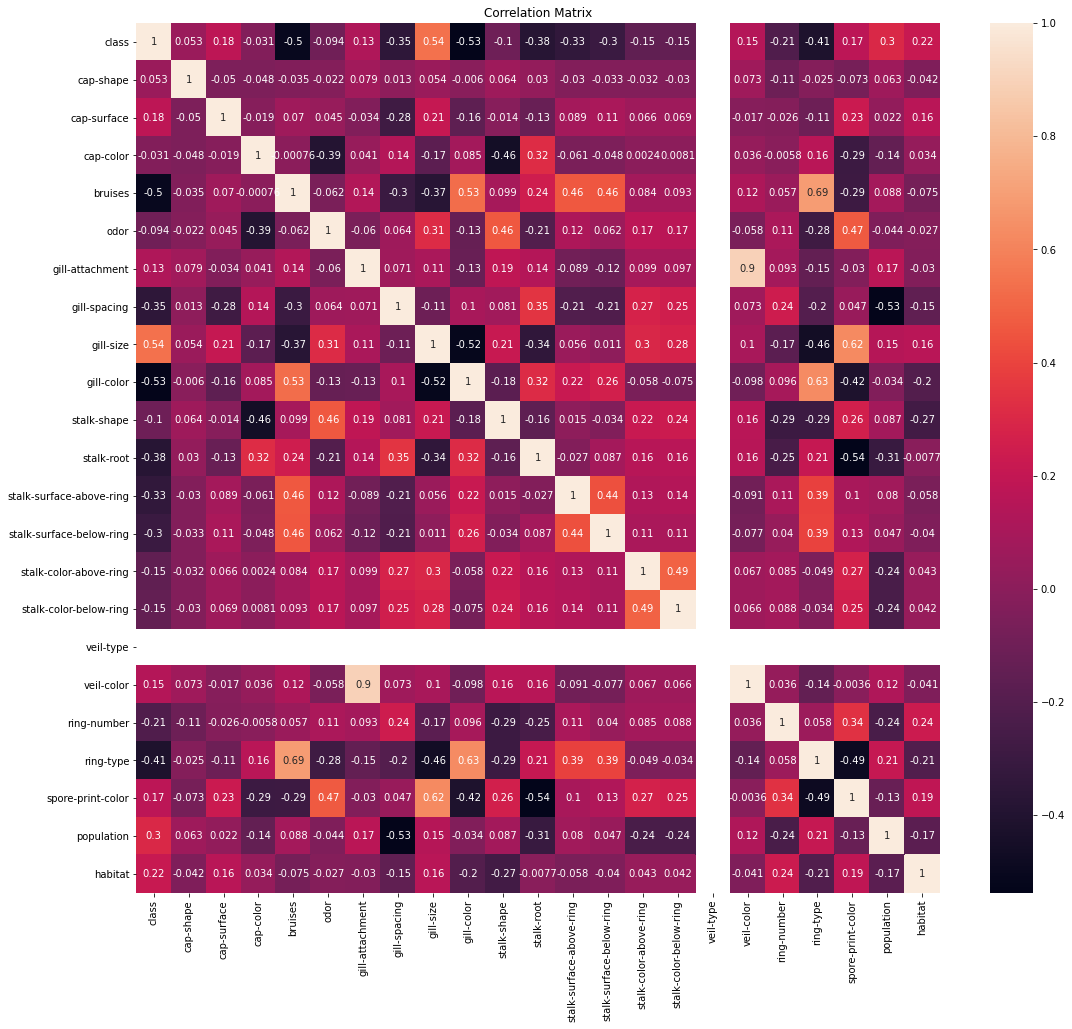

In [42]:
plt.figure(figsize=[18,16])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [43]:
mushroom.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [44]:
mushroom.cov()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,0.249708,0.042450,0.109669,-0.039926,-0.123517,-0.098346,0.010246,-0.064068,0.124725,-0.938648,...,-0.103907,-0.100932,-0.146352,-0.139847,0.017600,-0.029037,-0.370722,0.204743,0.186880,0.186662
cap-shape,0.042450,2.573872,-0.099551,-0.196877,-0.027970,-0.074033,0.020079,0.007791,0.040079,-0.034300,...,-0.030327,-0.035345,-0.096593,-0.092991,0.028249,-0.046329,-0.073582,-0.280636,0.127381,-0.116505
cap-surface,0.109669,-0.099551,1.512586,-0.060747,0.042568,0.117033,-0.006671,-0.127774,0.118293,-0.701101,...,0.068093,0.089758,0.154485,0.161585,-0.004955,-0.008717,-0.235779,0.675052,0.033193,0.346678
cap-color,-0.039926,-0.196877,-0.060747,6.481204,-0.000959,-2.073310,0.016740,0.135155,-0.199403,0.763042,...,-0.096252,-0.082105,0.011446,0.039124,0.022321,-0.004018,0.745403,-1.780460,-0.461464,0.148550
bruises,-0.123517,-0.027970,0.042568,-0.000959,0.242900,-0.064102,0.010743,-0.054317,-0.084191,0.919750,...,0.141144,0.152911,0.078298,0.087302,0.014324,0.007586,0.615326,-0.334683,0.054388,-0.063657
odor,-0.098346,-0.074033,0.117033,-2.073310,-0.064102,4.425676,-0.019894,0.049499,0.301905,-0.962374,...,0.155078,0.087913,0.698261,0.679731,-0.029480,0.063814,-1.066522,2.351129,-0.114904,-0.096286
gill-attachment,0.010246,0.020079,-0.006671,0.016740,0.010743,-0.019894,0.025184,0.004175,0.007994,-0.072234,...,-0.008769,-0.012463,0.029968,0.029408,0.034564,0.004011,-0.041941,-0.011164,0.032900,-0.008272
gill-spacing,-0.064068,0.007791,-0.127774,0.135155,-0.054317,0.049499,0.004175,0.135432,-0.018427,0.130541,...,-0.048567,-0.053180,0.192165,0.177936,0.006552,0.024242,-0.129887,0.041495,-0.243869,-0.097908
gill-size,0.124725,0.040079,0.118293,-0.199403,-0.084191,0.301905,0.007994,-0.018427,0.213624,-0.845554,...,0.016174,0.003404,0.260660,0.245692,0.011643,-0.021469,-0.383779,0.686072,0.085464,0.128321
gill-color,-0.938648,-0.034300,-0.701101,0.763042,0.919750,-0.962374,-0.072234,0.130541,-0.845554,12.534142,...,0.493473,0.615586,-0.392522,-0.504959,-0.083837,0.092179,4.014657,-3.510304,-0.151114,-1.235966


In [45]:
eig_val, eig_vec = np.linalg.eig(mushroom.cov())

In [46]:
print("Eigen Values", eig_val)

Eigen Values [1.73364029e+01 8.51611542e+00 6.30549691e+00 3.48016862e+00
 2.98800678e+00 2.60751361e+00 2.39501783e+00 2.00132211e+00
 1.83178338e+00 1.32761797e+00 1.05058679e+00 5.30940593e-01
 2.86609307e-01 2.21741918e-01 1.98109669e-01 1.36792877e-01
 9.05393946e-02 6.43753797e-02 3.90826993e-02 2.27079864e-02
 1.11342209e-02 2.77245169e-03]


In [47]:
print("Eigen Vectors", eig_vec)

Eigen Vectors [[ 5.59698202e-02 -5.72954325e-02  5.02152558e-02  1.37889341e-02
  -3.09696297e-02  1.24899276e-02  4.08049528e-02  1.46946164e-02
   7.08226518e-03  2.74784926e-02 -1.75372861e-01 -9.42176546e-02
  -1.33009259e-01 -2.54813940e-01  4.10420566e-01  4.88893944e-01
  -2.33623683e-01  7.12423247e-02 -5.70457511e-01 -2.53747219e-01
   8.78547273e-02 -1.31024583e-02]
 [-4.95388598e-03 -9.02398965e-03  8.39111661e-02 -2.56964325e-01
   4.58931100e-02 -6.65060789e-01  6.79729859e-01  1.12218876e-01
   3.60736104e-03  2.84184461e-03  7.99790457e-02 -2.43574954e-02
  -6.19072906e-03  4.74434141e-03 -1.03774244e-02 -1.70304781e-02
  -4.66296381e-03 -1.57947622e-02 -6.18403434e-03 -1.57400702e-03
   1.65720752e-03  4.69798811e-04]
 [ 6.42387185e-02  2.53120200e-03 -4.64894011e-02  1.17693730e-01
  -1.33955330e-01  1.32805420e-01  1.40226845e-01  2.02365586e-01
   4.55938674e-02  9.24745101e-01  6.88248447e-02 -8.87141552e-02
  -6.28222548e-02  3.21233710e-02 -1.35919512e-02 -5.85696

In [48]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [49]:
for i in eig_pairs:
    print(i[0])

17.336402865524587
8.516115419156028
6.305496910156451
3.48016861559419
2.98800677809433
2.607513612671732
2.395017829035273
2.0013221114012714
1.8317833803651018
1.3276179708179787
1.0505867906484043
0.5309405925613013
0.28660930652889266
0.22174191770662205
0.1981096692517114
0.13679287748147137
0.09053939462250872
0.06437537967750538
0.03908269930616602
0.02270798635298432
0.011134220891947055
0.0027724516935949293


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit(mushroom)

StandardScaler()

In [52]:
scaled_data = scaler.transform(mushroom)
scaled_data

array([[ 1.0366127 ,  1.02971224,  0.14012794, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [-0.96468045,  1.02971224,  0.14012794, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-0.96468045, -2.08704716,  0.14012794, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.96468045, -0.8403434 ,  0.14012794, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [ 1.0366127 , -0.21699152,  0.95327039, ...,  1.42842641,
         0.28432981,  0.28570978],
       [-0.96468045,  1.02971224,  0.14012794, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)

In [55]:
pca.fit_transform(scaled_data)

array([[-0.32135068, -0.69403471],
       [-2.47697676, -0.08019819],
       [-2.17990563, -0.77002685],
       ...,
       [-1.89106517,  0.15183601],
       [ 3.72914785, -1.12122721],
       [-1.9409542 , -0.39728563]])

In [56]:
print(pca.explained_variance_ratio_)

[0.19017657 0.1257281 ]


In [57]:
pca.fit(scaled_data)

PCA(n_components=2)

In [58]:
x_pca = pca.transform(scaled_data)

In [59]:
scaled_data.shape

(8124, 22)

In [60]:
x_pca.shape

(8124, 2)

Text(0, 0.5, 'Second Principal Component')

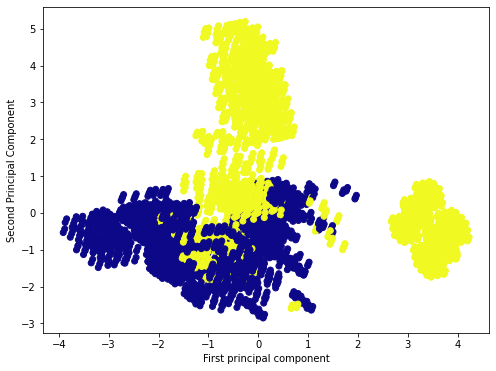

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=mushroom['class'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

We tried to perform PCA with two components but couldn't seperate all the variables exactly using 2 componenets, so we will check graph and verify the number of components 

In [62]:
x=mushroom.iloc[:,1:23]
y=mushroom['class']

In [63]:
x.shape

(8124, 21)

In [64]:
y.shape

(8124,)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

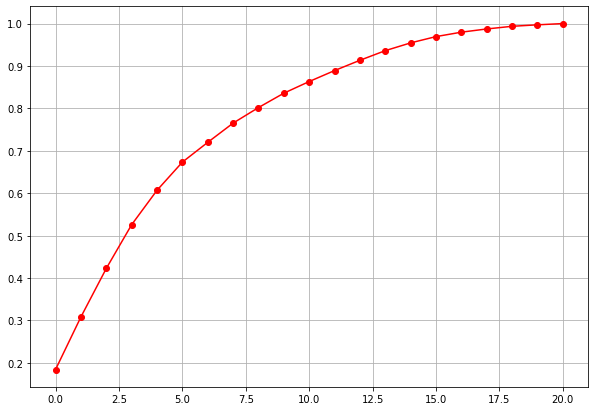

In [67]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

From graph we could find that 17 components explain 90% of data, so we will choose n as 17

In [68]:
new_pca = PCA(n_components=17)

In [69]:
x_new = new_pca.fit_transform(x)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state = 15)

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5686, 17)
(5686,)
(2438, 17)
(2438,)


Using Logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)
lr_predict_prob = lr.predict_proba(x_test)

print(lr_predict)
print(lr_predict_prob[:,1])

[0 1 1 ... 0 0 0]
[1.97819498e-02 9.73348318e-01 9.99862498e-01 ... 7.58644923e-02
 7.67810751e-08 6.62446500e-05]


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_accuracy)

[[1216   47]
 [  83 1092]]
0.9466776045939295


Accuracy Score in Logistic Regression is almost 95%

In [77]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,lr_predict_prob[:,1] )

In [78]:
from sklearn.metrics import auc
lr_auc = auc(fpr, tpr)
print(lr_auc)

0.9740145887030204


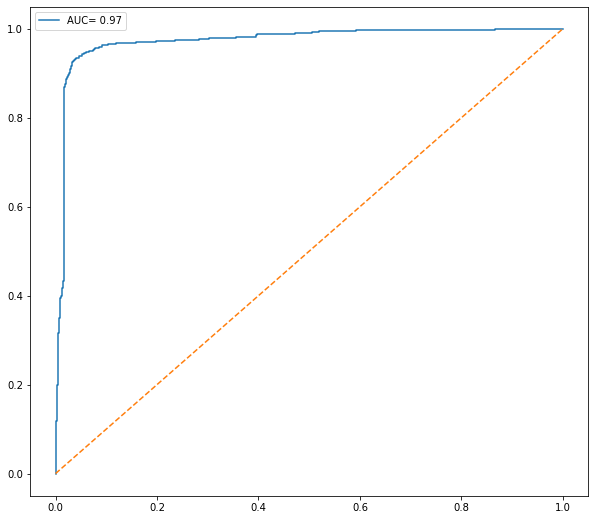

In [79]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % lr_auc )
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

Using Naive Bayes 

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_predict_prob = gnb.predict_proba(x_test)

print(gnb_predict)
print(gnb_predict_prob)

[0 1 1 ... 0 0 0]
[[1.00000000e+00 2.01361681e-37]
 [1.48081811e-02 9.85191819e-01]
 [6.03212214e-04 9.99396788e-01]
 ...
 [8.77218993e-01 1.22781007e-01]
 [9.70850767e-01 2.91492325e-02]
 [1.00000000e+00 6.36430597e-63]]


In [81]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)

print(gnb_conf_matrix)
print(gnb_accuracy_score)


[[1210   53]
 [ 105 1070]]
0.9351927809680065


Accuracy Score of Naive Bayes Model is nearly 93.5%

In [82]:
fpr, tpr, thresholds = roc_curve(y_test, gnb_predict_prob[:,1])
gnb_auc = auc(fpr, tpr)
print(gnb_auc)

0.9516517578881758


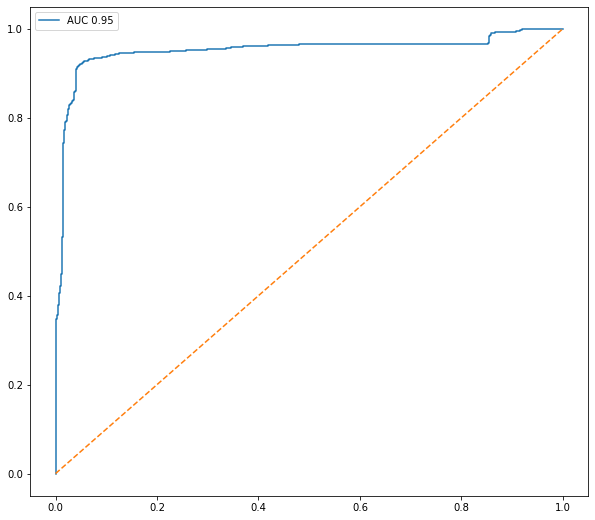

In [83]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % gnb_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

Using Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_predict_prob = dt.predict_proba(x_test)

In [85]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)

In [86]:
print(dt_conf_matrix)
print(dt_accuracy_score)

[[1259    4]
 [  15 1160]]
0.9922067268252666


Accuracy Score of Decision Tree is 99%

In [87]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, dt_predict_prob[:,1])
dt_auc = auc(fpr, tpr)
print(dt_auc)

0.994625090547666


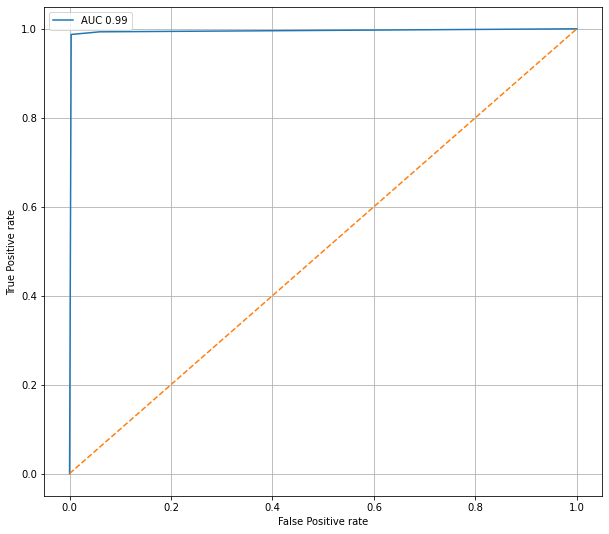

In [88]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % dt_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

Using Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_predict_prob = rf.predict_proba(x_test)

In [90]:
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_accuracy_score)

[[1262    1]
 [   1 1174]]
0.9991796554552912


Accuraccy Score in Random Forest Classifier is 99.9%

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, rf_predict_prob[:,1])
rf_auc = auc(fpr, tpr)
print(rf_auc)

0.9999979784707131


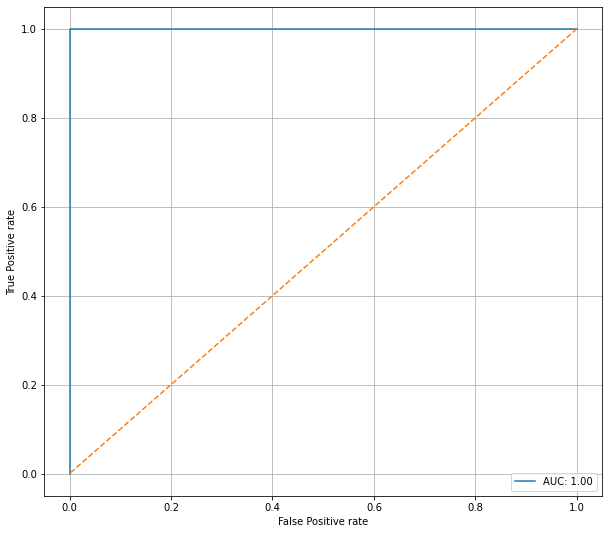

In [92]:
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid()

In [93]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=6)
print('Cross validation score of Logistic Regression : ',scr.mean())

Cross validation score of Logistic Regression :  0.8906942392909896


In [94]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(gnb, x, y, cv=6)
print('Cross validation score of Naive Bayes : ',scr.mean())

Cross validation score of Naive Bayes :  0.8153618906942394


In [95]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

Cross validation score of Decision Tree :  0.9500246184145741


In [96]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=6)
print('Cross validation score of Random Forest Classifier : ',scr.mean())

Cross validation score of Random Forest Classifier :  0.9247907434761201


From above cross validation, we can observe that Decision Tree Classifier is having least difference between accuracy score and cross validation.

So, DECISION TREE CLASSIFIER with accuracy score of 99% is the best model

In [98]:
import joblib
joblib.dump(dt,'Mushroom.pkl')

['Mushroom.pkl']

Saved the model as Mushroom.pkl